## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
from tensorflow import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, n_neurons=[], drop_ratio=0.2, output_units=10):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, cond in enumerate(n_neurons):
        if i == 0:
            x = keras.layers.Dense(units=cond, activation='relu')(input_layer)
            x = keras.layers.Dropout(drop_ratio)(x)
        else:
            x = keras.layers.Dense(units=cond, activation='relu')(x)
            x = keras.layers.Dropout(drop_ratio)(x)
    out = keras.layers.Dense(units=output_units, activation='softmax')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-4
BATCH_SIZE = 256
EPOCHS = 50
DROP_RATIO = [0.1, 0.2, 0.3, 0.4, 0.5]
N_NEURON = [[1024,512,256,128],[1024,512,256,128,64],[1024,512,256,128,64,32]]

In [13]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for drop, num in itertools.product(DROP_RATIO, N_NEURON):
    keras.backend.clear_session()
    model = build_mlp(input_shape=x_train.shape[1:], n_neurons=num, drop_ratio=drop, output_units=10)
    optimizer = keras.optimizers.Adam(learning_rate=LEARNING_RATE)
    model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=optimizer)
    
    model.fit(x_train,y_train,
              epochs=EPOCHS,
              batch_size=BATCH_SIZE,
              validation_data=(x_test,y_test),
              shuffle=True)
    train_loss = model.history.history['loss']
    train_acc = model.history.history['accuracy']
    valid_loss = model.history.history['val_loss']
    valid_acc = model.history.history['val_accuracy']
    
    name_tag = "num_neuron=%s, drop_ratio=%s" % (str(len(num)) , str(drop))
    results[name_tag] = {'train_acc':train_acc,
                         'train_loss':train_loss,
                         'valid_acc':valid_acc,
                         'valid_loss':valid_loss}
    

Epoch 1/50
196/196 [==============================] - 1s 6ms/step - loss: 1.9788 - accuracy: 0.2851 - val_loss: 1.7738 - val_accuracy: 0.3699
Epoch 2/50
196/196 [==============================] - 1s 6ms/step - loss: 1.7685 - accuracy: 0.3643 - val_loss: 1.6695 - val_accuracy: 0.4045
Epoch 3/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6773 - accuracy: 0.3998 - val_loss: 1.5919 - val_accuracy: 0.4304
Epoch 4/50
196/196 [==============================] - 1s 6ms/step - loss: 1.6175 - accuracy: 0.4212 - val_loss: 1.5522 - val_accuracy: 0.4464
Epoch 5/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5713 - accuracy: 0.4393 - val_loss: 1.5197 - val_accuracy: 0.4615
Epoch 6/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5346 - accuracy: 0.4554 - val_loss: 1.5182 - val_accuracy: 0.4603
Epoch 7/50
196/196 [==============================] - 1s 6ms/step - loss: 1.5027 - accuracy: 0.4673 - val_loss: 1.4944 - val_accuracy: 0.4682
Epoch 

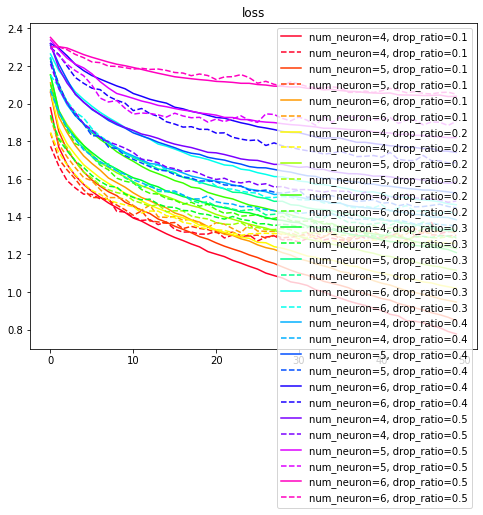

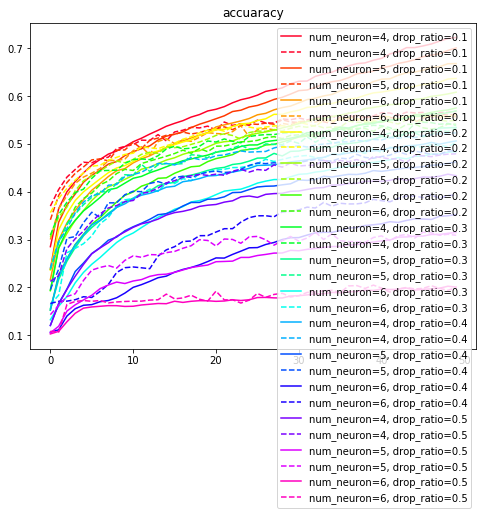

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS = 15

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_loss'])),results[cond]['train_loss'],'-',color=color_bar[i],label=cond)
    plt.plot(range(len(results[cond]['valid_loss'])),results[cond]['valid_loss'],'--',color=color_bar[i],label=cond)
plt.title('loss')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train_acc'])),results[cond]['train_acc'],'-',color=color_bar[i],label=cond)
    plt.plot(range(len(results[cond]['valid_acc'])),results[cond]['valid_acc'],'--',color=color_bar[i],label=cond)
plt.title('accuaracy')
plt.legend()
plt.show()

